In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Define the path to your dataset directory (contains the 5 folders)
data_dir = os.path.join(os.getcwd(), 'combined_dataset')

# Parameters for image size and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and rescaling; using a 20% split for validation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load the MobileNetV2 model with pre-trained weights and exclude the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduces spatial dimensions
x = Dense(128, activation='relu')(x)  # A dense layer for learning
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Final softmax layer

# Combine the base model and custom layers into a final model
model = Model(inputs=base_model.input, outputs=predictions)

# Initially, freeze the base model layers to train the new classifier layers only
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with the Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model for 20 epochs
epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Optional: Unfreeze some of the top layers of MobileNetV2 to fine-tune the model further
# Uncomment the block below to perform fine-tuning after the initial training

# for layer in base_model.layers[-20:]:
#     layer.trainable = True
#
# # Re-compile the model with a lower learning rate
# model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])
#
# # Fine-tune for additional epochs
# fine_tune_epochs = 10
# total_epochs = epochs + fine_tune_epochs
# history_fine = model.fit(
#     train_generator,
#     validation_data=validation_generator,
#     epochs=total_epochs,
#     initial_epoch=history.epoch[-1]
# )

# Save the trained model in .keras format
model.save('mobilenetv2_trained_model.keras')


Found 20000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


C:\Users\rmish\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8411 - loss: 0.4330

C:\Users\rmish\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1820s 3s/step - accuracy: 0.8412 - loss: 0.4328 - val_accuracy: 0.9500 - val_loss: 0.1280
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1361s 2s/step - accuracy: 0.9420 - loss: 0.1611 - val_accuracy: 0.9594 - val_loss: 0.1055
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1243s 2s/step - accuracy: 0.9467 - loss: 0.1450 - val_accuracy: 0.9636 - val_loss: 0.1010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 961s 2s/step - accuracy: 0.9571 - loss: 0.1207 - val_accuracy: 0.9582 - val_loss: 0.1031
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1113s 2s/step - accuracy: 0.9488 - loss: 0.1346 - val_accuracy: 0.9670 - val_loss: 0.0856
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 942s 2s/step - accuracy: 0.9558 - loss: 0.1185 - val_accuracy: 0.9652 - val_loss: 0.0852
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1122s 2s/step - accuracy: 0.9580 - loss: 0.1093 - val_accuracy: 0.9712 - val_loss: 0.0713
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 934s 1s/step - accuracy: 0.9562 - loss: 0.1144 - val_accuracy: 

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Define the path to your dataset directory (contains the 5 folders)
data_dir = os.path.join(os.getcwd(), 'combined_dataset')

# Parameters for image size and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and rescaling; using a 20% split for validation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load the previously saved model
model = load_model('mobilenetv2_trained_model.keras')

# Identify the base MobileNetV2 sub-model and unfreeze its top layers for fine-tuning.
# Assuming the MobileNetV2 model is nested as a sub-model, we search for it by name.
base_model = None
for layer in model.layers:
    if isinstance(layer, tf.keras.Model) and 'mobilenetv2' in layer.name.lower():
        base_model = layer
        break

if base_model is not None:
    # Unfreeze the last 20 layers of the base model for fine-tuning
    for layer in base_model.layers[-20:]:
        layer.trainable = True
else:
    # If the base model is not found, you can also try unfreezing some of the later layers of the full model.
    # Here we unfreeze the last 20 layers of the entire model as a fallback.
    for layer in model.layers[-20:]:
        layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# (Optional) Add callbacks such as ReduceLROnPlateau and EarlyStopping to help the fine-tuning process
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', 
    factor=0.5, 
    patience=2, 
    verbose=1, 
    min_lr=1e-7
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    restore_best_weights=True
)

# Fine-tune the model for additional epochs
fine_tune_epochs = 10
history_fine = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=fine_tune_epochs,
    callbacks=[lr_scheduler, early_stopping]
)

# Save the fine-tuned model in .keras format
model.save('mobilenetv2_finetuned_model.keras')


Found 20000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1131s 2s/step - accuracy: 0.8336 - loss: 0.9516 - val_accuracy: 0.9638 - val_loss: 0.1221 - learning_rate: 1.0000e-05
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1008s 2s/step - accuracy: 0.9331 - loss: 0.2016 - val_accuracy: 0.9676 - val_loss: 0.1033 - learning_rate: 1.0000e-05
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1038s 2s/step - accuracy: 0.9433 - loss: 0.1591 - val_accuracy: 0.9634 - val_loss: 0.1099 - learning_rate: 1.0000e-05
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 999s 2s/step - accuracy: 0.9479 - loss: 0.1472 - val_accuracy: 0.9726 - val_loss: 0.0716 - learning_rate: 1.0000e-05
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1043s 2s/step - accuracy: 0.9547 - loss: 0.1213 - val_accuracy: 0.9780 - val_loss: 0.0575 - learning_rate: 1.0000e-05
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1010s 2s/step - accuracy: 0.9594 - loss: 0.1093 - val_accuracy: 0.9774 - val_loss: 0.0

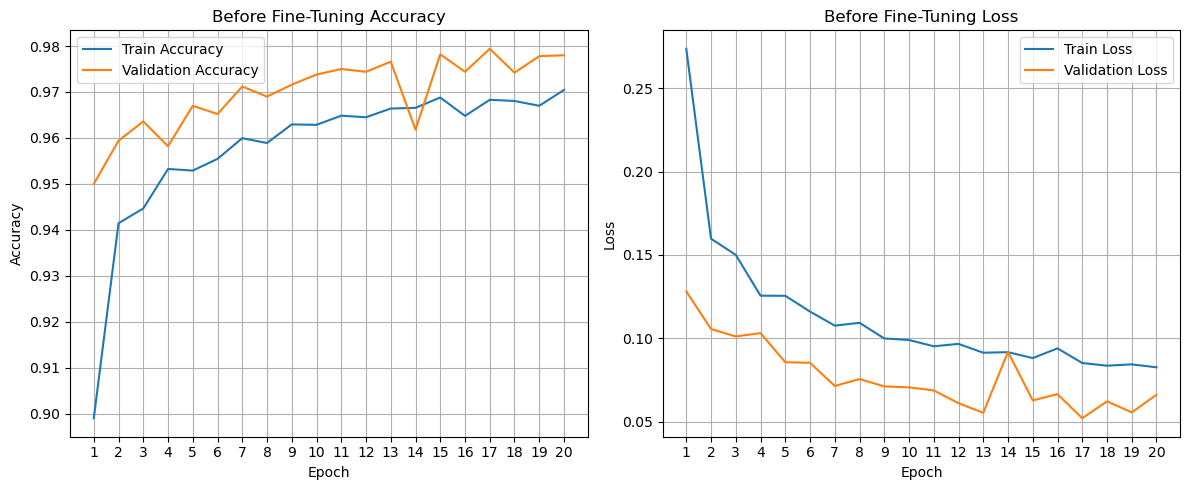

157/157 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step


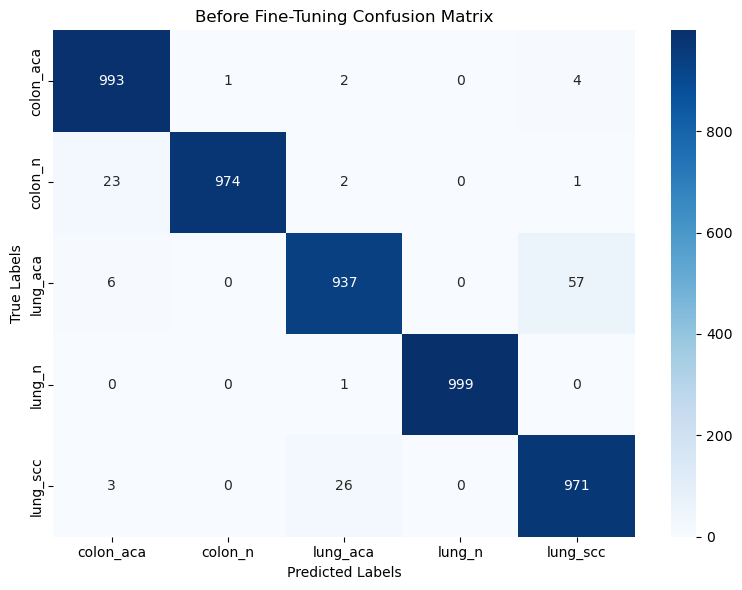

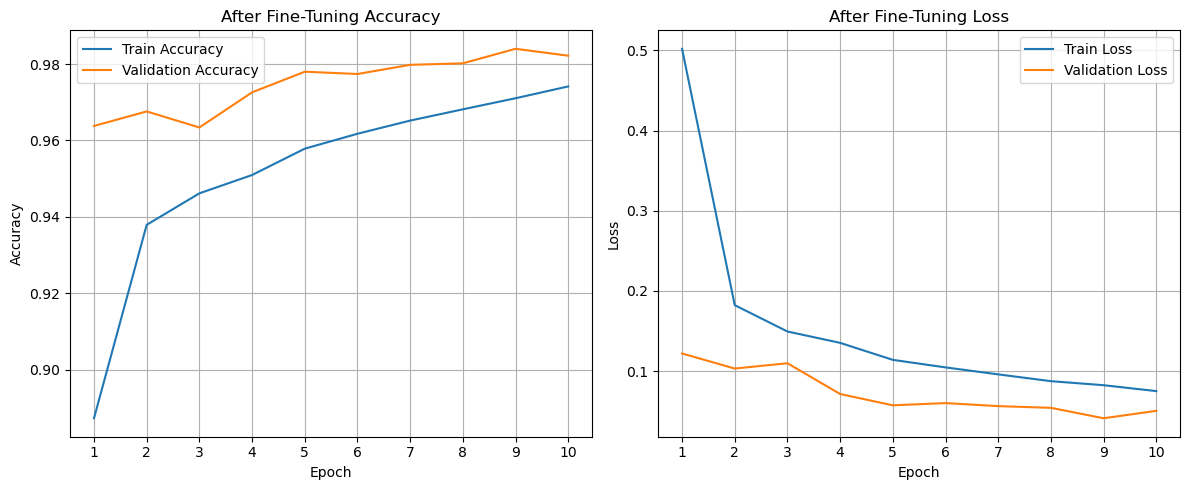

157/157 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step


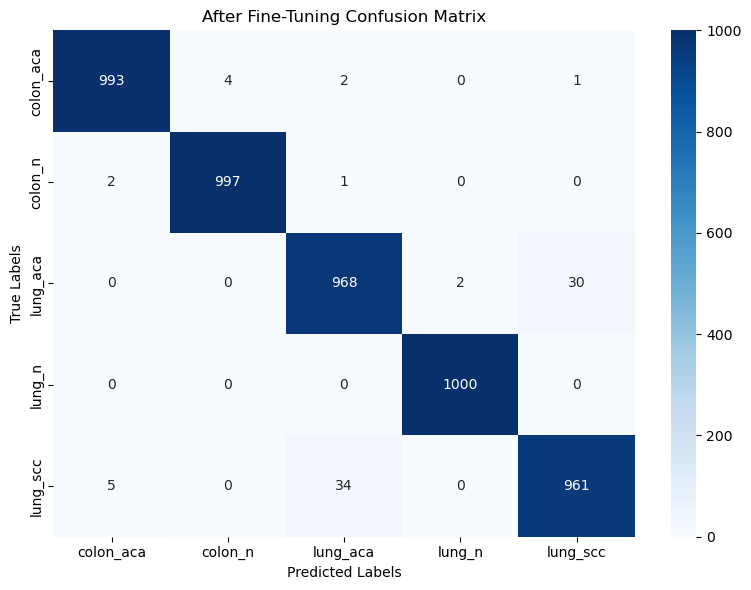

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# ---- Plot Accuracy & Loss (with Integer Epochs) ----
def plot_metrics(history, title_prefix=''):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = list(range(1, len(acc) + 1))  # Use integer epoch numbers starting from 1

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title(f'{title_prefix} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(epochs)
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title(f'{title_prefix} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(epochs)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# ---- Plot Confusion Matrix ----
def plot_confusion_matrix(model, generator, title_prefix=''):
    predictions = model.predict(generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = generator.classes
    class_labels = list(generator.class_indices.keys())

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'{title_prefix} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# ---- Load Pre-Fine-Tuned Model ----
model_before_finetuning = load_model('mobilenetv2_trained_model.keras')

# ---- Plot All Graphs ----

# BEFORE Fine-Tuning
plot_metrics(history, title_prefix='Before Fine-Tuning')
plot_confusion_matrix(model_before_finetuning, validation_generator, title_prefix='Before Fine-Tuning')

# AFTER Fine-Tuning
plot_metrics(history_fine, title_prefix='After Fine-Tuning')
plot_confusion_matrix(model, validation_generator, title_prefix='After Fine-Tuning')
